<a href="https://colab.research.google.com/github/yishairasowsky/Sefaria-Project/blob/master/topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd

In [0]:
prayer_df = pd.read_csv('/content/prayer-sources.csv', 
                        # encoding="latin-1"
                        )
not_prayer_df = pd.read_csv('/content/not-prayer-sources.csv', 
# not_prayer_df = pd.read_csv('/content/not-prayer-sources-more.csv', 
                            # encoding="latin-1"
                            )

In [1057]:
prayer_df.sample(3)

,Ref,En,He
205,Sefer Kuzari 4:7,7. The Rabbi: We are like those weak-eyed persons who cannot bear the brightness of the light. W...,(ז) אָמַר הֶחָבֵר: אֲבָל אֲנַחְנוּ כְּבַעֲלֵי הָעֵינַיִם הַתְּרוּטוֹת אֲשֶׁר לֹא יוּכְלוּ לִרְאו...
571,Jerusalem Talmud Ta'anit 9a:3-9b:1,NaN,תני ושפל ברך ונוח תשחורת ורגיל בחכמה ורגיל באגדה ויש לו בית ושדה. תנינן וביתו ריקן ואת אמר הכין....
291,Or HaChaim on Numbers 14:24:1-2,"ועבדי כלב , ""and My servant Caleb, etc."" Why did the Torah not mention Joshua also at this junct...","ועבדי כלב עקב וגו' . צריך לדעת למה לא הזכיר אלא כלב ולא יהושע, גם כוונת אומרו היתה רוח אחרת עמו,..."


In [1058]:
prayer_df['is_prayer'] = 'yes'
prayer_df = prayer_df[['En','is_prayer']]

prayer_df.tail(3)

,En,is_prayer
1049,"It is true that you are the one who judges, and reproves, who knows all, and bears witness, who ...",yes
1050,"In these Berachot (blessings) we bow down: the first Beracha (blessing) [of Shemoneh Esreh], in ...",yes
1051,On seeds he says [the Beracha (blessing)] Borei Minei Zerayim (Who created different types of se...,yes


In [1059]:
not_prayer_df.sample(3)

,Ref,En,He,Topics
365,Rabbeinu Yonah on Pirkei Avot 3:7:1,"Rabbi Elazar, man of Bartuta, says: Give Him from what is His: This is speaking whether about th...",רבי אלעזר איש ברתותא אומר תן לו משלו. זה מדבר בין לענין גופו של אדם בין לענין ממונו. ולומר שלא י...,tzedakah
148,Eruvin 69b:21,"The Gemara answers: He needed it due to the ruling in the latter clause, which includes the nove...",סיפא איצטריכא ליה שנים נותנין רשות הא נמי פשיטא מהו דתימא,hilchot-eruv-chatzerot-and-shituf-mevoaot
3,Ezekiel 44:6,"And thou shalt say to the rebellious, even to the house of Israel: Thus saith the Lord GOD: O ye...",וְאָמַרְתָּ֤ אֶל־מֶ֙רִי֙ אֶל־בֵּ֣ית יִשְׂרָאֵ֔ל כֹּ֥ה אָמַ֖ר אֲדֹנָ֣י יְהוִ֑ה רַב־לָכֶ֛ם מִֽכָּל...,sin-during-the-days-of-the-first-temple


In [1060]:
not_prayer_df['is_prayer'] = 'no'
not_prayer_df = not_prayer_df[['En','is_prayer']]
not_prayer_df.sample(3)

,En,is_prayer
1021,NaN,no
533,"The words of the LORD are pure words, As silver tried in a crucible on the earth, refined seven ...",no
852,"shown to all souls. After it departs from him, the soul follows the same way that person followe...",no


In [1061]:
all_prayer_frames = [prayer_df, not_prayer_df]
all_prayer_df = pd.concat(all_prayer_frames)
all_prayer_df.reset_index(inplace=True)
# all_prayer_df.style.set_properties({'align': 'right'})

# all_prayer_df.tail(3)
all_prayer_df.sample(5)
# all_prayer_df.loc[[345]]

,index,En,is_prayer
56,56,"The Gemara asks: And with regard to the other Sage, i.e., Rabbi Yehuda HaNasi, who does not hold...",yes
1718,666,"and the honor of your fellow like the reverence of your teacher, and the reverence of your teach...",no
500,500,MISHNA: One may only stand and begin to pray from an approach of gravity and submission. There i...,yes
1299,247,NaN,no
331,331,NaN,yes


In [1062]:
print("Before dropping duplicates",all_prayer_df.shape)
all_prayer_df.drop_duplicates(inplace=True)
print("After dropping duplicates",all_prayer_df.shape)
print("Nulls before dropping:",all_prayer_df.isnull().sum()[0])
all_prayer_df.dropna(inplace=True)
print("Nulls after dropping:",all_prayer_df.isnull().sum()[0])
# all_prayer_df.isnull().sum()
# all_prayer_df.sample(5)

Before dropping duplicates (2103, 3)
After dropping duplicates (2103, 3)
Nulls before dropping: 0
Nulls after dropping: 0


In [1063]:
del all_prayer_df['index']
all_prayer_df.sample(3)

,En,is_prayer
762,"And Ĥanna prayed, and said, My heart rejoices in the Lord, my horn is exalted in the Lord: my mo...",yes
552,§ Rabbi Ile’a bar Yeverekhya says: If it were not for the prayer of David for Israel to have sus...,yes
1089,"One who went insane, they provide for his sons and daughters from [selling] his property, even i...",no


In [1064]:
shape = all_prayer_df.shape
print(f"{shape[0]} rows and {shape[1]} columns")

1247 rows and 2 columns


In [1065]:
all_prayer_df['is_prayer'] = all_prayer_df['is_prayer'].map({'no': 0, 'yes': 1})
all_prayer_df.sample(5)

,En,is_prayer
1198,"Rava adds: The kneading of consecrated dough exempts it from the obligation of ḥalla , as we lea...",0
897,"to keep for thy good the commandments of the LORD, and His statutes, which I command thee this d...",1
881,"And it shall be for a sign unto thee upon thy hand, and for a memorial between thine eyes, that ...",1
762,"And Ĥanna prayed, and said, My heart rejoices in the Lord, my horn is exalted in the Lord: my mo...",1
1509,"If one transacts business on word of honor, the law against defrauding does not apply to him. If...",0


In [1066]:
print('Prayer:', (all_prayer_df.is_prayer.values == 1).sum())
print('Not prayer:', (all_prayer_df.is_prayer.values == 0).sum())

Prayer: 579
Not prayer: 668


In [1067]:
nltk.download('stopwords')

import nltk
import string

from nltk.corpus import stopwords

whitelist = set('abcdefghijklmnopqrstuvwxyz ZXCVBNMASDFGHJKLQWERTYUIOP')

def process_text(text):
    '''
    1. Keep only letters and spaces
    2. Remove stopwords
    3. Return str of clean text words
    '''
    #1
    chars_str = ''.join(filter(whitelist.__contains__, text))
    #2
    clean_words = [word.lower() for word in chars_str.split() if word.lower() not in stopwords.words('english')]
    #3
    return ' '.join(clean_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [1068]:
sample_text = '''aBC.!@#$%^&    c*(בחתו ‎‎‎ או‎ בקרחתו — une...
233 the gns: ac ...
1041    7. a pien p'''
process_text(sample_text)

'abc c une gns ac pien p'

In [1069]:
# all_prayer_df['En'].head().apply(process_text)
all_prayer_df['En'] = all_prayer_df['En'].apply(process_text)
all_prayer_df.head()
# all_prayer_df.loc[[345]]


,En,is_prayer
0,another abba binyamins statements regard laws prayer taught baraita abba binyamin says two peopl...,1
1,taught baraita abba binyamin said ones prayer fully heard synagogue stated regard king solomons ...,1
2,additionally ravin bar rav adda said rabbi yitzak said one accustomed come synagogue come one da...,1
3,similarly taught baraita rabbi yishmael ben elisha high priest said yom kippur entered innermost...,1
4,meaning written let prayer unto lord time favor god abundance mercy answer truth salvation psalm...,1


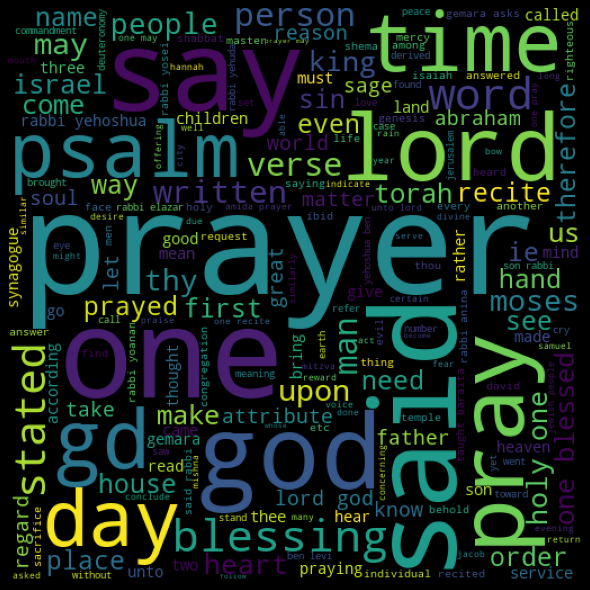

In [1070]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['is_prayer'] == 1]['En']))
prayer_wc = WordCloud(width = 512,height = 512).generate(prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

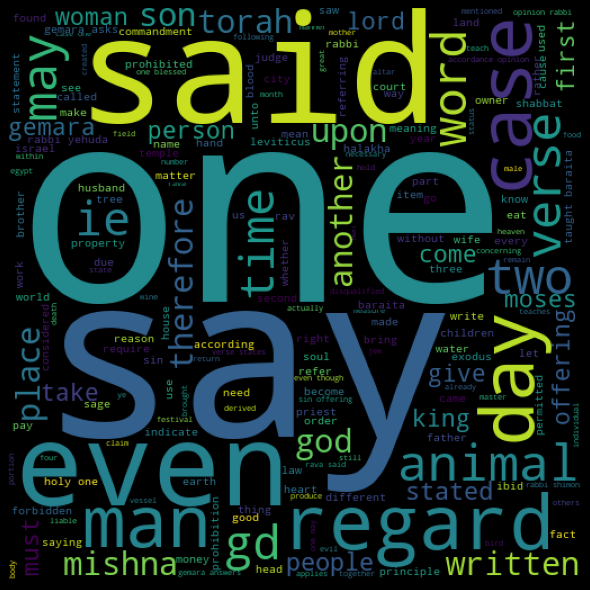

In [1071]:
not_prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['is_prayer'] == 0]['En']))
not_prayer_wc = WordCloud(width = 512,height = 512).generate(not_prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(not_prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [1072]:
X = all_prayer_df.En
y = all_prayer_df.is_prayer
print(f"Totals: {X.shape} / {y.shape}")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(f"\nTrain: {X_train.shape} / {y_train.shape}")

print(f"\nTest: {X_test.shape} / {y_test.shape}")

Totals: (1247,) / (1247,)

Train: (935,) / (935,)

Test: (312,) / (312,)


In [0]:
# Convert a collection of text documents to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# vectorizer = CountVectorizer(analyzer=process_text)
# vectorizer = CountVectorizer(ngram_range=(2, 4))
# vectorizer = HashingVectorizer(ngram_range=(2, 4),alternate_sign=False)
vectorizer = TfidfVectorizer(ngram_range=(2, 4))
# vectorizer.fit(X_train)

In [1074]:
print("Shape of document term matrix")

# X_train_dtm = vectorizer.transform(X_train)
X_train_dtm = vectorizer.fit_transform(X_train)
print(f"Train: {X_train_dtm.shape}")

# prayer_bag_of_words = vectorizer.fit_transform(all_prayer_df['En'])
X_test_dtm = vectorizer.transform(X_test)
print(f"Test: {X_test_dtm.shape}")

Shape of document term matrix
Train: (935, 168960)
Test: (312, 168960)


In [1075]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB

classifier = MultinomialNB()
# classifier = ComplementNB()

# for Gaussian need array format
# X_train = X_train.toarray()
# X_test = X_test.toarray()
# classifier = GaussianNB()
# classifier = BernoulliNB()

%time classifier.fit(X_train_dtm, y_train)
y_pred_class = classifier.predict(X_test_dtm)
from sklearn import metrics
print('\nAccuracy:',metrics.accuracy_score(y_test, y_pred_class))
print("\nHow many prayer (1) and non prayer (0)?")
print(y_test.value_counts())
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('\nNull accuracy:', null_accuracy)

negs = y_test.value_counts()[0]
poss = y_test.value_counts()[1]
print('Manual null accuracy:',(1 / (1 + negs/poss)))

print("\nConfusion Matrix:")
metrics.confusion_matrix(y_test, y_pred_class)

CPU times: user 10.7 ms, sys: 0 ns, total: 10.7 ms
Wall time: 10.8 ms

Accuracy: 0.8108974358974359

How many prayer (1) and non prayer (0)?
0    159
1    153
Name: is_prayer, dtype: int64

Null accuracy: 0    0.509615
Name: is_prayer, dtype: float64
Manual null accuracy: 0.4903846153846154

Confusion Matrix:


array([[137,  22],
       [ 37, 116]])

In [1076]:
TP = X_test[y_pred + y_test == 2]
TN = X_test[y_pred + y_test == 0]
FP = X_test[y_pred > y_test]
FN = X_test[y_pred < y_test]

pd.options.display.max_colwidth = 100

# pd.style.set_properties(**{'text-align': 'left'})

# print("\n*** TP ***")
# print(TP.sample(5))
# print("\n*** TN ***")
# print(TN.sample(5))
print("\n*** FP ***")
print(FP.sample(10))
print("\n*** FN ***")
print(FN.sample(10))

ValueError: ignored

In [0]:
# FP.to_csv('FP', sep='\t', encoding='utf-8')
# FN.to_csv('FN', sep='\t', encoding='utf-8')
